In [3]:
# Import libraries
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import matplotlib as mpl

# Import the function to get connect to the db
from snowexsql.db import get_db

# Import data from the SQL database
from snowexsql.data import SiteData, PointData, LayerData, ImageData

# Import a useful function to format that data into a dataframe
from snowexsql.conversions import query_to_geopandas

# Import some tools to build dates 
from datetime import date

# This is what you will use for all of hackweek to access the db
db_name = 'snow:hackweek@52.32.183.144/snowex'

# Using the function get_db, we receive 2 ways to interact with the database
engine, session = get_db(db_name)

In [4]:
# Pick a dataset
dataset = 'temperature'

# Pick a date
collection_date = date(2020, 1, 31)

# The part inside the query function is what we want back, in this case all columns for the point data
qry = session.query(LayerData)

# We then want to filter by the selected the data type depth.
qry = qry.filter(LayerData.type == dataset)

# Filter by a date
qry = qry.filter(LayerData.date == collection_date)

# Filter by depth
qry = qry.filter(LayerData.depth == 0)

# Limit it to a couple thousand 
qry = qry.limit(2000)


# Execute the query and convert to geopandas in one handy function
df = query_to_geopandas(qry, engine)

# how many did we retrieve?
print(f'{len(df.index)} records returned!')

17 records returned!


In [26]:
df

,site_name,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,...,geom,time,depth,site_id,bottom_depth,comments,sample_a,sample_b,sample_c,value
0,Grand Mesa,2020-01-31,2021-06-01 18:41:28.544122+00:00,None,7019,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (741132.000 4327061.000),14:05:00-06:00,0.0,2C6,None,None,None,None,None,-1.3
1,Grand Mesa,2020-01-31,2021-06-01 18:41:29.814198+00:00,None,7464,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (741378.000 4326992.000),10:55:00-06:00,0.0,1C7,None,None,None,None,None,-1.1
2,Grand Mesa,2020-01-31,2021-06-01 18:41:31.368784+00:00,None,8003,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (740765.000 4327379.000),12:27:00-06:00,0.0,2C3,None,None,None,None,None,-2.5
3,Grand Mesa,2020-01-31,2021-06-01 18:41:33.776808+00:00,None,8874,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (741580.000 4326713.000),11:50:00-06:00,0.0,2C9,None,None,None,None,None,-1.6
4,Grand Mesa,2020-01-31,2021-06-01 18:41:35.846668+00:00,None,9593,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (741493.000 4326833.000),15:10:00-06:00,0.0,1C8,None,None,None,None,None,-1.6
5,Grand Mesa,2020-01-31,2021-06-01 18:41:36.210425+00:00,None,9730,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (742453.000 4325752.000),14:01:00-06:00,0.0,1C14,None,None,None,None,None,-1.1
6,Grand Mesa,2020-01-31,2021-06-01 18:41:37.972137+00:00,None,10362,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (740508.000 4327577.000),11:07:00-06:00,0.0,1C1,None,None,None,None,None,-1.7
7,Grand Mesa,2020-01-31,2021-06-01 18:41:38.002865+00:00,None,10375,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (741960.000 4326644.000),13:05:00-06:00,0.0,6C10,None,None,None,None,None,-0.6
8,Grand Mesa,2020-01-31,2021-06-01 18:41:39.131912+00:00,None,10799,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (745010.000 4323372.000),09:15:00-06:00,0.0,9C28,None,None,None,None,None,-1.0
9,Grand Mesa,2020-01-31,2021-06-01 18:41:41.958275+00:00,None,11700,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (740652.000 4327445.000),09:00:00-06:00,0.0,2C2,None,None,None,None,None,-2.1


## Create Dataframe that includes all pit temperatures

In [5]:
# Pick a dataset
dataset = 'temperature'

# The part inside the query function is what we want back, in this case all columns for the point data
qry = session.query(LayerData)

# We then want to filter by the selected the data type depth.
qry = qry.filter(LayerData.type == dataset)

# Limit it to a couple thousand 
qry = qry.limit(2000)

# Execute the query and convert to geopandas in one handy function
df = query_to_geopandas(qry, engine)

# how many did we retrieve?
print(f'{len(df.index)} records returned!')

1675 records returned!


In [15]:
df.shape

(1675, 27)

In [16]:
df.head()

,site_name,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,...,geom,time,depth,site_id,bottom_depth,comments,sample_a,sample_b,sample_c,value
0,Grand Mesa,2020-02-08,2021-06-01 18:41:07.336058+00:00,None,52,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743099.000 4324022.000),11:25:00-06:00,121.0,6N16,None,None,None,None,None,-2.7
1,Grand Mesa,2020-02-08,2021-06-01 18:41:07.339711+00:00,None,53,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743099.000 4324022.000),11:25:00-06:00,120.0,6N16,None,None,None,None,None,-0.7
2,Grand Mesa,2020-02-08,2021-06-01 18:41:07.342189+00:00,None,54,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743099.000 4324022.000),11:25:00-06:00,110.0,6N16,None,None,None,None,None,-6.6
3,Grand Mesa,2020-02-08,2021-06-01 18:41:07.344766+00:00,None,55,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743099.000 4324022.000),11:25:00-06:00,100.0,6N16,None,None,None,None,None,-6.4
4,Grand Mesa,2020-02-08,2021-06-01 18:41:07.346941+00:00,None,56,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (743099.000 4324022.000),11:25:00-06:00,90.0,6N16,None,None,None,None,None,-5.8


## Reformat data table

In [6]:
#example of a column that only returns none type
df['type'].unique()

array(['temperature'], dtype=object)

In [7]:
#drop columns that only contain None
df_c = df.drop(columns=['date_accessed','surveyors','units','instrument','time_updated','time_created','bottom_depth',
                        'comments','sample_a','sample_b','sample_c','elevation','type','doi','id'])
df_c = df_c.rename(columns={"value": "temperature_C","depth":"depth_cm"})
df_c.head()

,site_name,date,latitude,longitude,northing,easting,utm_zone,geom,time,depth_cm,site_id,temperature_C
0,Grand Mesa,2020-02-05,39.016974,-108.180911,4322442.0,744072.0,12,POINT (744072.000 4322442.000),13:40:00-06:00,10.0,8S18,-1.5
1,Grand Mesa,2020-02-05,39.016974,-108.180911,4322442.0,744072.0,12,POINT (744072.000 4322442.000),13:40:00-06:00,0.0,8S18,-0.6
2,Grand Mesa,2020-02-05,39.019474,-108.192314,4322689.0,743076.0,12,POINT (743076.000 4322689.000),09:45:00-06:00,77.0,2S10,-20.0
3,Grand Mesa,2020-02-05,39.019474,-108.192314,4322689.0,743076.0,12,POINT (743076.000 4322689.000),09:45:00-06:00,70.0,2S10,-19.3
4,Grand Mesa,2020-02-05,39.019474,-108.192314,4322689.0,743076.0,12,POINT (743076.000 4322689.000),09:45:00-06:00,60.0,2S10,-12.6


In [8]:
#re-arrange the columns
cols = ['site_name','site_id','date','time','depth_cm','temperature_C','latitude','longitude','northing','easting','utm_zone','geom']
df_c = df_c[cols]
df_c.head()

,site_name,site_id,date,time,depth_cm,temperature_C,latitude,longitude,northing,easting,utm_zone,geom
0,Grand Mesa,8S18,2020-02-05,13:40:00-06:00,10.0,-1.5,39.016974,-108.180911,4322442.0,744072.0,12,POINT (744072.000 4322442.000)
1,Grand Mesa,8S18,2020-02-05,13:40:00-06:00,0.0,-0.6,39.016974,-108.180911,4322442.0,744072.0,12,POINT (744072.000 4322442.000)
2,Grand Mesa,2S10,2020-02-05,09:45:00-06:00,77.0,-20.0,39.019474,-108.192314,4322689.0,743076.0,12,POINT (743076.000 4322689.000)
3,Grand Mesa,2S10,2020-02-05,09:45:00-06:00,70.0,-19.3,39.019474,-108.192314,4322689.0,743076.0,12,POINT (743076.000 4322689.000)
4,Grand Mesa,2S10,2020-02-05,09:45:00-06:00,60.0,-12.6,39.019474,-108.192314,4322689.0,743076.0,12,POINT (743076.000 4322689.000)


In [14]:
#get all unique dates (14 days), create and save plot for each using near surface temperature
dates = df_c['date'].unique()
df_max = pd.DataFrame(columns=cols)
i = 0
#loop through all dates
for date in dates:
    #trim to only values for a selected date
    df_date = df_c[df_c['date'] == date]
    #get all sites w/ data on the selected date
    sites = df_date['site_id'].unique()
    #loop through all sites to identify temperatures nearest the surface
    for site in sites:
        #trim to only values for a selected site on a selected date
        df_site_date = df_date[df_date['site_id'] == site]
        #find maximum depth and extract temperature value and append to new dataframe
        #print(date)
        #print(site)
        #print(df_site_date.loc[df_site_date['depth_cm'].idxmax(),'site_name':'geom'])
        #df_max[i,'site_name':'geom'] = df_max.append(df_site_date.loc[df_site_date['depth_cm'].idxmax(),'site_name':'geom'])
        df_max.loc[i] = df_site_date.loc[df_site_date['depth_cm'].idxmax(),'site_name':'geom']
        i += 1
        

In [15]:
df_max

,site_name,site_id,date,time,depth_cm,temperature_C,latitude,longitude,northing,easting,utm_zone,geom
0,Grand Mesa,8S18,2020-02-05,13:40:00-06:00,101.0,-13.1,39.016974,-108.180911,4322442.0,744072.0,12,POINT (744072 4322442)
1,Grand Mesa,2S10,2020-02-05,09:45:00-06:00,77.0,-20.0,39.019474,-108.192314,4322689.0,743076.0,12,POINT (743076 4322689)
2,Grand Mesa,8C36,2020-02-05,09:22:00-06:00,76.0,-20.6,39.008706,-108.154670,4321595.0,746373.0,12,POINT (746373 4321595)
3,Grand Mesa,1S13,2020-02-05,13:15:00-06:00,83.0,-16.7,39.017789,-108.190059,4322508.0,743277.0,12,POINT (743277 4322508)
4,Grand Mesa,8C35,2020-02-05,10:20:00-06:00,85.0,-11.1,39.010813,-108.157218,4321822.0,746145.0,12,POINT (746145 4321822)
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Grand Mesa,8C31,2020-02-09,12:30:00-06:00,100.0,-4.4,39.021438,-108.164010,4322983.0,745520.0,12,POINT (745520 4322983)
151,Grand Mesa,8C32,2020-02-09,13:50:00-06:00,91.0,-4.7,39.020483,-108.163286,4322879.0,745586.0,12,POINT (745586 4322879)
152,Grand Mesa,9C23,2020-02-09,09:00:00-06:00,87.0,-6.8,39.028080,-108.175607,4323689.0,744493.0,12,POINT (744493 4323689)
153,Grand Mesa,5C27,2020-02-09,10:35:00-06:00,100.0,-4.0,39.025466,-108.173690,4323404.0,744668.0,12,POINT (744668 4323404)


In [17]:
#save as .csv of surface temperatures
df_max.to_csv('PitSurfaceTemps.csv', index=False)

In [96]:
# convert to geodataframe
gdf_max = geopandas.GeoDataFrame(df_max, geometry=df_max.geom) #geopandas.points_from_xy(df.Longitude, df.Latitude))
gdf_max = gdf_max.drop(columns='geom')
gdf_max['temperature_C'] = gdf_max['temperature_C'].astype(float)
gdf_max.dtypes #to check datatypes of values in dataframe

site_name          object
site_id            object
date               object
time               object
depth_cm          float64
temperature_C     float64
latitude          float64
longitude         float64
northing          float64
easting           float64
utm_zone           object
geometry         geometry
dtype: object

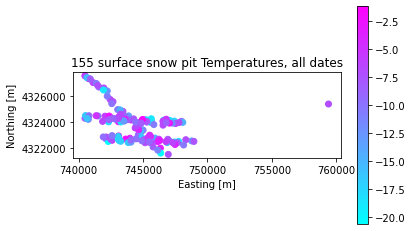

In [102]:
# Get the Matplotlib Axes object from the dataframe object, color the points by snow depth value
ax = gdf_max.plot(column='temperature_C', legend=True, cmap=mpl.cm.cool)

# Use non-scientific notation for x and y ticks
ax.ticklabel_format(style='plain', useOffset=False)

# Set the various plots x/y labels and title.
#ax.set_title(f'{len(df.index)} {dataset.title()}s collected on {collection_date.strftime("%Y-%m-%d")}')
ax.set_title(f'{len(gdf_max.index)} surface snow pit {dataset.title()}s, all dates')
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')

# Close the session to avoid hanging transactions
session.close()

## To create an interactive plot with a time slider of all surface temperature pit data

In [11]:
# TO DO

In [16]:
df_max.head()

,site_name,site_id,date,time,depth_cm,temperature_C,latitude,longitude,northing,easting,utm_zone,geom
0,Grand Mesa,8S18,2020-02-05,13:40:00-06:00,101.0,-13.1,39.016974,-108.180911,4322442.0,744072.0,12,POINT (744072 4322442)
1,Grand Mesa,2S10,2020-02-05,09:45:00-06:00,77.0,-20.0,39.019474,-108.192314,4322689.0,743076.0,12,POINT (743076 4322689)
2,Grand Mesa,8C36,2020-02-05,09:22:00-06:00,76.0,-20.6,39.008706,-108.154670,4321595.0,746373.0,12,POINT (746373 4321595)
3,Grand Mesa,1S13,2020-02-05,13:15:00-06:00,83.0,-16.7,39.017789,-108.190059,4322508.0,743277.0,12,POINT (743277 4322508)
4,Grand Mesa,8C35,2020-02-05,10:20:00-06:00,85.0,-11.1,39.010813,-108.157218,4321822.0,746145.0,12,POINT (746145 4321822)
